# Mental Health in Tech

## Table of Contents


* [Import Libraries](#import)
* [Data Cleaning](#cleaning)
* [Feature Engineering](#feature)
* [Analysis](#analysis)
    - [Visualizations](#visual)
    - [Models](#models)
        - [Random Forest](#random)
        - [Gradient](#gradient)
        - [Logistic](#logistic)
        - [Decision Tree](#decision)
    - [Final Accuracies](#final)
* [Submisson](#submission)    
    

<a id = "import"></a>
# Import Libraries

In [129]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import re

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        


/kaggle/input/mental-health-in-tech-survey/survey.csv


In [130]:
def dummyEncode(df):
    columnsToEncode = list(df.select_dtypes(include=['category','object']))
    le = LabelEncoder()
    for feature in columnsToEncode:
        try:
            df[feature] = le.fit_transform(df[feature])
        except:
            print('Error encoding '+feature)
    return df

In [131]:
health = pd.read_csv("/kaggle/input/mental-health-in-tech-survey/survey.csv")
health.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


<a id = "data_cleaning"></a>
# Data Cleaning

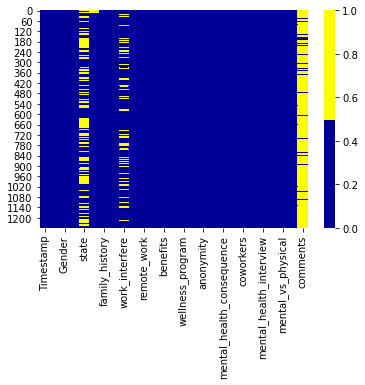

In [132]:
cols = health.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(health[cols].isnull(), cmap=sns.color_palette(colours))

In [133]:
health.drop('work_interfere', axis=1, inplace=True)
health.drop('comments', axis=1, inplace=True)
health.drop('self_employed', axis=1, inplace=True)
country = health[['Country']]
#health = dummyEncode(health)
health = health.dropna()
health

,Timestamp,Age,Gender,Country,state,family_history,treatment,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,IL,No,Yes,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,M,United States,IN,No,No,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
4,2014-08-27 11:30:22,31,Male,United States,TX,No,No,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,2014-08-27 11:31:22,33,Male,United States,TN,Yes,No,6-25,No,Yes,...,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
6,2014-08-27 11:31:50,35,Female,United States,MI,Yes,Yes,1-5,Yes,Yes,...,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2015-08-25 19:59:38,36,Male,United States,UT,Yes,No,More than 1000,No,No,...,Don't know,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No
1255,2015-09-26 01:07:35,32,Male,United States,IL,Yes,Yes,26-100,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,2015-11-07 12:36:58,34,male,United States,CA,Yes,Yes,More than 1000,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,100-500,Yes,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [148]:
import pycountry
import plotly.express as px
import pandas as pd

list_state = health['state'].unique().tolist()

d_country_code = {}  # To hold the country names and their ISO
for country in list_state:
    try:
        country_data = pycountry.countries.search_fuzzy(country)
        country_code = country_data[0].alpha_3
        d_country_code.update({country: country_code})
    except:
        print('could not add ISO 3 code for ->', country)
        d_country_code.update({country: ' '})

for k, v in d_country_code.items():
    health.loc[(health.state == k), 'iso_alpha'] = v

fig = px.choropleth(data_frame = health,
                    locations= "iso_alpha", 
                    color_continuous_scale="Viridis",
                    range_color=(0, 12),
                    #scope = 'usa',
                    color = "anonymity"
                    )
fig.show()

could not add ISO 3 code for -> TX
could not add ISO 3 code for -> WV
